# Visual Odometry on KITTI Dataset

In [1]:
import cv2
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
poses = pd.read_csv('Kitti-Odometry/data_odometry_poses/dataset/poses/00.txt', delimiter=' ', header= None)
print("Shape: ", poses.shape)
poses.head()

Shape:  (4541, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043680e-12,2.326809e-11,5.551115e-17,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-4.440892e-16
1,0.999998,5.272628e-04,-2.066935e-03,-4.690294e-02,-5.296506e-04,0.999999,-1.154865e-03,-2.839928e-02,2.066324e-03,1.155958e-03,0.999997,8.586941e-01
2,0.999991,1.048972e-03,-4.131348e-03,-9.374345e-02,-1.058514e-03,0.999997,-2.308104e-03,-5.676064e-02,4.128913e-03,2.312456e-03,0.999989,1.716275e+00
3,0.999980,1.566466e-03,-6.198571e-03,-1.406429e-01,-1.587952e-03,0.999993,-3.462706e-03,-8.515762e-02,6.193102e-03,3.472479e-03,0.999975,2.574964e+00
4,0.999964,2.078471e-03,-8.263498e-03,-1.874858e-01,-2.116664e-03,0.999987,-4.615826e-03,-1.135202e-01,8.253797e-03,4.633149e-03,0.999955,3.432648e+00


In [3]:
print('First Position:')
first_pose = np.array(poses.iloc[0]).reshape((3,4)).round(2)
first_pose

First Position:


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.]])

In [4]:
#lets store all these poses in ground_truth 
gt = np.zeros((len(poses) ,3,4))
for i in range(len(poses)):
    gt[i] = np.array(poses.iloc[i]).reshape((3,4))

In [5]:
print(gt[0])

[[ 1.000000e+00  9.043680e-12  2.326809e-11  5.551115e-17]
 [ 9.043683e-12  1.000000e+00  2.392370e-10  3.330669e-16]
 [ 2.326810e-11  2.392370e-10  9.999999e-01 -4.440892e-16]]


In [6]:
gtdot= gt[1].dot(np.array([0,0,0,1]))
print(gtdot)
print('This shows that in the 2nd frame car moved 0.85m distance forward')

[-0.04690294 -0.02839928  0.8586941 ]
This shows that in the 2nd frame car moved 0.85m distance forward


### Now Lets Plot the trajectory of the ground truth

In [7]:
%matplotlib inline

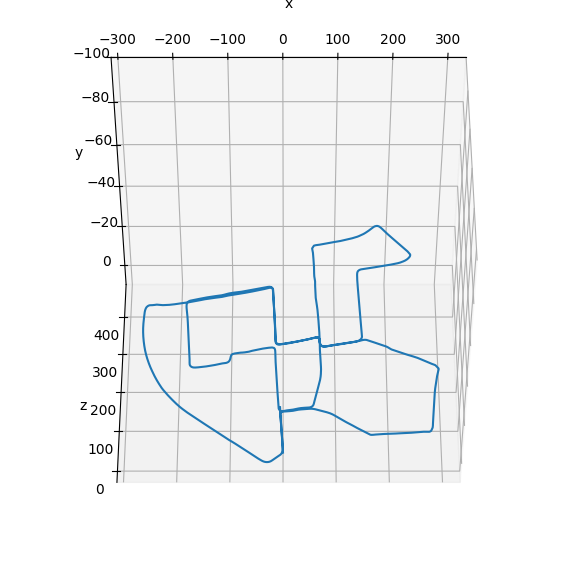

In [8]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(gt[:,:,3][:,0], gt[:,:,3][:,1], gt[:,:,3][:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_ylim(-100,10)

ax.view_init(elev=-40, azim = 270)


We can dsee the trajectory of 00 dataset 

### Now lets look at the images we got

In [9]:
test_img = cv2.imread('Kitti-Odometry/data_odometry_gray/dataset/sequences/00/image_0/000000.png')
type(test_img)

numpy.ndarray

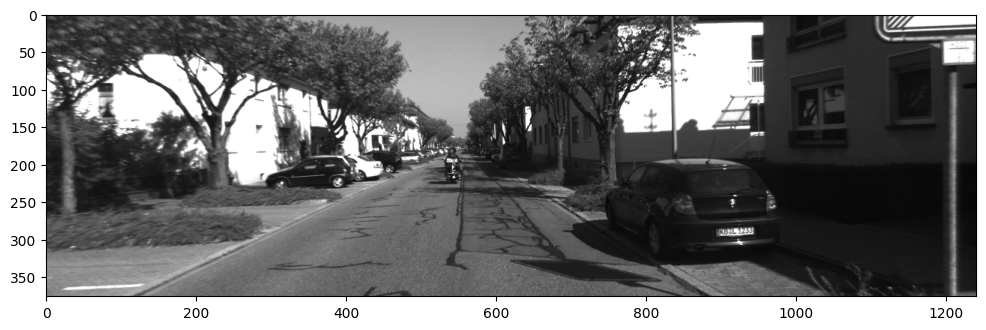

In [10]:
plt.figure(figsize=(12,6))
plt.imshow(test_img)

Let's list the path of all the left and right images

In [11]:
left_images = os.listdir('Kitti-Odometry/data_odometry_gray/dataset/sequences/00/image_0')
right_images= os.listdir('Kitti-Odometry/data_odometry_gray/dataset/sequences/00/image_1')

In [12]:
left_images = sorted(left_images)
right_images = sorted(right_images)

left_images[:5]

['000000.png', '000001.png', '000002.png', '000003.png', '000004.png']

In [13]:
len(left_images)

4541

In [14]:
len(poses)

4541

In [15]:
timestamps = pd.read_csv('Kitti-Odometry/data_odometry_gray/dataset/sequences/00/times.txt', delimiter = ' ', header= None)
timestamps.head()

,0
0,0.000000
1,0.103736
2,0.207338
3,0.311075
4,0.414692


In [16]:
calib = pd.read_csv('Kitti-Odometry/data_odometry_calib/dataset/sequences/00/calib.txt', delimiter= ' ', header= None, index_col = 0)
calib.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856000,0.000000,607.192800,0.000000,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P1:,718.856000,0.000000,607.192800,-386.144800,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P2:,718.856000,0.000000,607.192800,45.382250,0.000000,718.856000,185.215700,-0.113089,0.000000,0.000000,1.000000,0.003780
P3:,718.856000,0.000000,607.192800,-337.287700,0.000000,718.856000,185.215700,2.369057,0.000000,0.000000,1.000000,0.004915
Tr:,0.000428,-0.999967,-0.008084,-0.011985,-0.007211,0.008081,-0.999941,-0.054040,0.999974,0.000486,-0.007207,-0.292197


These are `3x4` Projection matices which contains `K(camera intrinsic matrix)`, and `T(or [R|t] transformation matrix)`

Now these Projection matrices are `AFTER RECTIFICATION` which means that they all project the 3D points on a common `Image Plane` irrespective of the camera (whethere it is left or right camera).

It helps in simplification of the calculations.

In [17]:
# Let's Decompose the Projection matrix into intrinsic matrix, rotation matrix and translation vector
P1 = np.array(calib.loc['P1:']).reshape((3,4))

k1, r1, t1, _, _, _, _ = cv2.decomposeProjectionMatrix(P1)

#since the t1 is in homogeneous coordinates
t1 = t1/t1[3]

print("Intrinsic Matirx: \n", k1)
print("Rotation Matrix: \n", r1)
print("Translation Vector: \n", t1.round(4))

Intrinsic Matirx: 
 [[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Rotation Matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Translation Vector: 
 [[ 0.5372]
 [ 0.    ]
 [-0.    ]
 [ 1.    ]]


In [18]:
# Now lets stack R and t to get T
T = np.hstack([r1, t1[:3]]).round(4)
print(T)
print('--------------------------------------------------------')

[[ 1.      0.      0.      0.5372]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.     -0.    ]]
--------------------------------------------------------


You can see the above Transformation matrix is `3x4` and to get homogeneous transformation matrix we will stack it with `[0,0,0,1]` vertically

In [19]:
T_homo = np.vstack([T, [0,0,0,1]])
T_homo_inv = np.linalg.inv(T_homo)

In [20]:
print("T_homo: \n", T_homo)
print("T_homo_inv: \n", T_homo_inv)
print('--------------------------------------------------------')

T_homo: 
 [[ 1.      0.      0.      0.5372]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.     -0.    ]
 [ 0.      0.      0.      1.    ]]
T_homo_inv: 
 [[ 1.      0.      0.     -0.5372]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]]
--------------------------------------------------------


To get Point in the pixel coordinate we have to do `x = PX`.
But the coordinate we will get will be in homogeneous so we have to normalize it with the `x[2]` to get exact pixel coordinate. 

In [21]:
# let say point be [1,1,1,1], keep in mind X=1, Y=1, Z=1, and the forth 1 is for homogeneous.
org_pt = np.array([1,1,1,1]).reshape(-1,1)

transformed_pt = gt[15].dot(org_pt)
depth_from_cam = transformed_pt[2] # last value of the transfromed point

print("Original Point: ", org_pt)
print("Transformed Point: ", transformed_pt)
print("Depth from camera: ", depth_from_cam)
print('--------------------------------------------------------')

Original Point:  [[1]
 [1]
 [1]
 [1]]
Transformed Point:  [[ 0.27241151]
 [ 0.55374297]
 [13.91604816]]
Depth from camera:  [13.91604816]
--------------------------------------------------------


What we did above is, we have transformed the arbitrary point `[1,1,1,1]` with respect to the `15th frame`, which means we have transfromed by 
`rotation and translation` but we still have to have dot with `Camera Matrix (k)` to get the correct pixel coordinate in the image frame of reference.

In [22]:
# So now lets multiply with the k1 to get the pixel coordinates
pixel_coord = k1.dot(transformed_pt/depth_from_cam)
pixel_coord


array([[621.26465768],
       [213.82018961],
       [  1.        ]])

In [23]:
transformed_pt/depth_from_cam

array([[0.01957535],
       [0.03979168],
       [1.        ]])

Keep in mind, the ration of `transformed_pt/depth_from_camera` is called `Normalized Coordinates` which have unit distance from the camera.

---------------------------------------------------------------------------

To restore the 3D coordinates from the pixel coordinate do the following

In [24]:
restored_3D = np.linalg.inv(k1).dot(pixel_coord)
restored_3D = (restored_3D.T * depth_from_cam).round(4)
T_homo = np.vstack([gt[15], np.array([0, 0, 0, 1])])
T_homo_inv = np.linalg.inv(T_homo)
restored_3D_homo = np.append(restored_3D, 1)
restored_3D_homo = T_homo_inv.dot(restored_3D_homo)

In [25]:
restored_3D_homo.round(1)

array([1., 1., 1., 1.])

 And there we have it, we went from a 3D point on a coordinate frame, projected it to pixel
 coordinates of a camera in a separate coordinate frame, reconstructed the metrics using a 
 known depth, and then reverse transformed the 3D point back into the original frame by
 inverting a homogeneous version of the original transformation matrix used and dotting it with
 the homogeneous 3D coordinates of the point in the camera's coordinate frame. This type of 
 math will come in handy later when we want to figure out where the car is in reference to the
 global coordinate frame.

## Dataset Handling

Let's create a dataset_handler class to make our data easily accessible as we complete our task.

In [26]:
class Dataset_Handler():
    def __init__(self, sequence, lidar=False, progress_bar=True, low_memory=True):
        import pandas as pd
        import os
        import cv2

        self.lidar = lidar
        self.low_memory = low_memory

        self.seq_dir= "Kitti-Odometry/data_odometry_gray/dataset/sequences/{}/".format(sequence)
        self.poses_dir = "Kitti-Odometry/data_odometry_poses/dataset/poses/{}.txt".format(sequence)

        poses = pd.read_csv(self.poses_dir, delimiter=' ', header= None)

        # Name of images files to iterate through
        self.left_images = sorted(os.listdir(self.seq_dir + 'image_0'), key=lambda x: int(x.split(".")[0]))
        self.right_images = sorted(os.listdir(self.seq_dir + 'image_1'), key=lambda x: int(x.split(".")[0]))

        # we are not using this
        if self.lidar:
            self.velodyne_files = os.listdir(self.seq_dir + 'velodyne')
            self.lidar_path = self.seq_dir + 'velodyne/'
        
        self.num_frames = len(self.left_images)

        # Now let's get the calibration matrices
        calib = pd.read_csv("Kitti-Odometry/data_odometry_calib/dataset/sequences/{}".format(sequence) + '/calib.txt',
                            delimiter = ' ', header = None, index_col =0)
        self.P0 = np.array(calib.loc['P0:']).reshape((3,4))
        self.P1 = np.array(calib.loc['P1:']).reshape((3,4))
        self.P2 = np.array(calib.loc['P2:']).reshape((3,4))
        self.P3 = np.array(calib.loc['P3:']).reshape((3,4))
        # this is the transformation matrix for LIDAR
        self.Tr = np.array(calib.loc['Tr:']).reshape((3,4))

        # timestamps data
        self.timestamps = np.array(pd.read_csv(self.seq_dir + 'times.txt', delimiter=' ', header= None))

        self.gt = np.zeros((len(poses), 3,4))
        for i in range(len(poses)):
            gt[i] = np.array(poses.iloc[i]).reshape((3,4))

        if self.low_memory:
            #provide data sequentialy to save RAM
            self.reset_frames()

            self.first_image_left = cv2.imread(self.seq_dir + 'image_0/' + self.left_images[0], 0)
            self.first_image_right = cv2.imread(self.seq_dir + 'image_1/' + self.right_images[0], 0)
            self.second_image_left = cv2.imread(self.seq_dir + 'image_0/' + self.left_images[1], 0)

            if self.lidar:
                self.first_pointcloud = np.fromfile(self.lidar_path + self.velodyne_files[0],
                                                    dype= np.float32,
                                                   count = -1).reshape((-1,4))

            self.imheight = self.first_image_left.shape[0]
            self.imwidth = self.first_image_left.shape[1]

        else:
            #if RAM is not a concern (>32GB), pass low_memory = false
            if progress_bar:
                import progressbar
                bar = progressbar.ProgressBar(max_value = self.num_frames)

            self.images_left = []
            self.images_right = []
            self.pointclouds = []

            for i, name_left in enumerate(self.left_images):
                name_right = self.right_images[i]
                self.images_left.append(cv2.imread(self.seq_dir + 'image_0'+ name_left))
                self.images_right.append(cv2.imread(self.seq_dir + 'image_1'+ name_right))

                if self.lidar:
                    pointcloud = np.fromfile(self.lidar_path + self.velodyne_files[i],
                                            dtype = np.float32,
                                            count = -1).reshape((-1,4))

                    self.pointclouds.append(pointcloud)

                if progress_bar:
                    bar.update(i+1)

            self.imheight = self.images_left[0].shape[0]
            self.imwidth = self.images_left[0].shape[1]

            # Keep consistent variable names as using low_memory
            self.first_image_left = self.images_left[0]
            self.first_image_right = self.images_right[0]
            self.second_image_left = self.images_left[1]
            if self.lidar:
                self.first_pointcloud = self.pointclouds[0]

    def reset_frames(self):
        # Reset all the generators to the first frame of the sequence
        self.images_left = (cv2.imread(self.seq_dir + 'image_0/' + name_left, 0)
                           for name_left in self.left_images)
        self.images_right = (cv2.imread(self.seq_dir + 'image_1/' + name_right, 0)
                           for name_right in self.right_images)

        if self.lidar:
            self.pointclouds = (np.fromfile(self.lidar_path + velodyne_file,
                                           dype = np.float32,
                                           count = -1).reshape((-1,4))
                               for velodyne_file in self.velodyne_files)

        pass
 

In [27]:
# Creating a handler object for the low_memory= True
handler = Dataset_Handler('00', low_memory=True)

# Stereo Depth and Disparity

From now we will focus on calculating the `disparity` between the left and right images, which will be used to calculate the `depth` of the particular pixel.

In [28]:
def compute_left_disparity_map(img_left, img_right, matcher='bm', rgb = False, verbose =False):
    
    sad_window = 6 
    num_disparities = sad_window*16
    blockSize = 15
    matcher = matcher.lower()
    
    if matcher == 'bm':
        matcher = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=blockSize)
        
    elif matcher == 'sgbm':
        matcher = cv2.StereoSGBM_create(numDisparities=num_disparities, 
                                        minDisparity=0,
                                        blockSize=blockSize,
                                        P1=8*3*sad_window**2,
                                        P2=32*3*sad_window**2,
                                        disp12MaxDiff=1,
                                        mode = cv2.STEREO_SGBM_MODE_SGBM_3WAY)
    if rgb:
        img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
        img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
        
    start = datetime.datetime.now()
    disparity = matcher.compute(img_left, img_right).astype(np.float32)/16
    end = datetime.datetime.now()
    
    if verbose:
        print("Time taken: ", end-start)
    
    return disparity

In [29]:
%matplotlib inline

Time taken:  0:00:00.046714


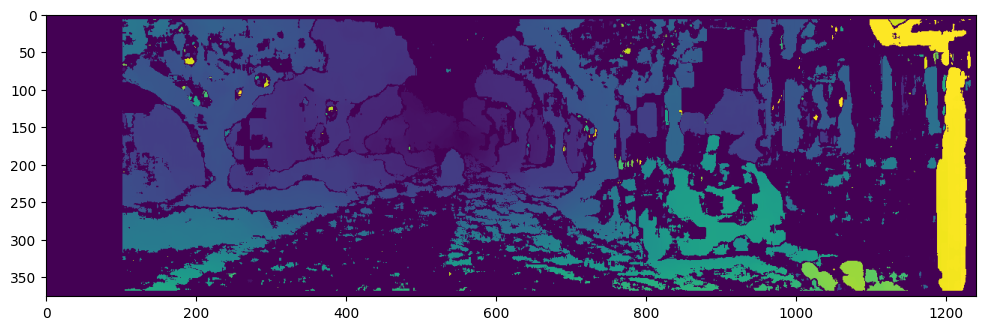

In [44]:

# Let's compute the disparity map for the first two images
disparity = compute_left_disparity_map(handler.first_image_left, 
                                       handler.first_image_right,
                                       matcher='bm',
                                       verbose=True)

plt.figure(figsize=(12,6))
plt.imshow(disparity, )

Time taken:  0:00:00.189869


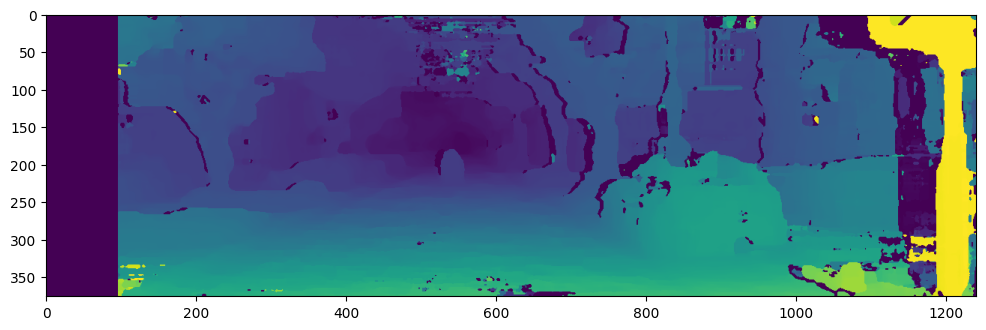

In [45]:
# Now let's use SGBM to compute the disparity map and compare the results
disparity_sgbm = compute_left_disparity_map(handler.first_image_left, 
                                            handler.first_image_right,
                                            matcher='sgbm',
                                            verbose=True)

plt.figure(figsize=(12,6))
plt.imshow(disparity_sgbm, )

In [46]:
disparity_sgbm[0][0]

np.float32(-1.0)

In [48]:
disparity_sgbm[disparity_sgbm >0].min()

np.float32(0.5625)

We can see there is a gap in the left side of the image which shows that right camera does not have matching information for that part.

In [35]:
def decompose_projection_matrix(P):
    k, r, t, _, _, _, _ = cv2.decomposeProjectionMatrix(P)
    t = t/t[3]
    
    return k, r, t

def calculate_depth_map(disparity, k_left, t_left,t_right, rectified= True):
    
    f= k_left[0,0]
    if rectified:
        b = t_right[0] - t_left[0]
    else:
        b = t_left[0] - t_right[0]
        
    # avoid division by zero
    disparity[disparity == 0] = 0.1
    disparity[disparity == -1] = 0.1
    
    depth_map = np.ones(disparity.shape)
    depth_map = f*b/disparity
    
    return depth_map

In [36]:
k_left, r_left, t_left = decompose_projection_matrix(handler.P0)
k_right, r_right, t_right = decompose_projection_matrix(handler.P1)

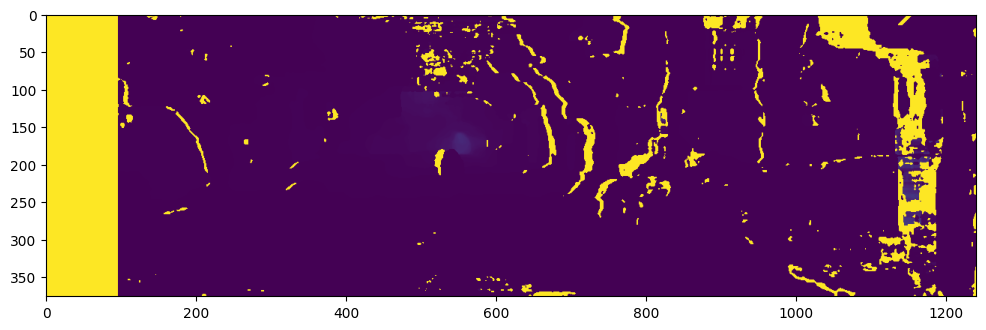

In [43]:
depth = calculate_depth_map(disparity_sgbm, k_left, t_left, t_right)
plt.figure(figsize=(12,6))
plt.imshow(depth)

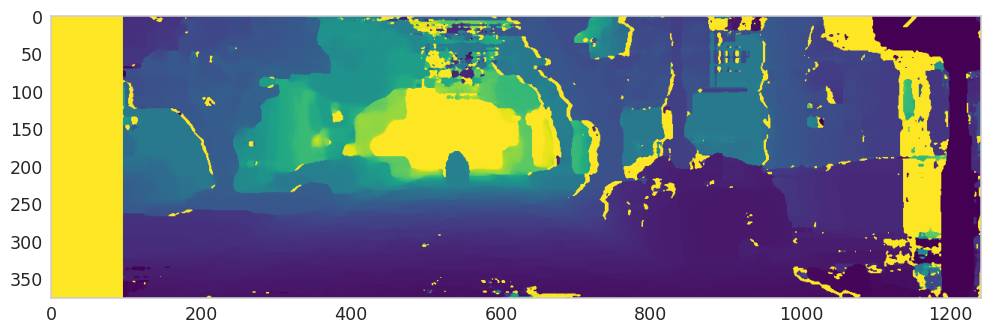

In [64]:
plt.figure(figsize=(12,6))
plt.grid(False)
depth[depth>50] = 50
plt.imshow(depth)

In [42]:
depth[0][0]

np.float64(3861.4479424599417)

In [49]:
depth.max()

np.float64(3861.4479424599417)

In [52]:
# %pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

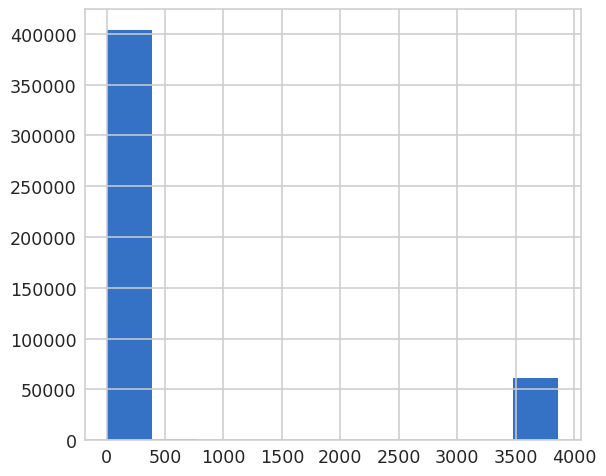

In [55]:
plt.hist(depth.flatten());

In [56]:
depth[depth <depth.max()].flatten().max()

np.float64(686.4796444444444)

#### Creating a mask to get rid of that rectangle block